<a href="https://colab.research.google.com/github/Gyanprakash136/Machine-learning-mini-projects/blob/main/DecisionTreeRegressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt


generating a dataset based on quadratic training set +noise

In [5]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4* (X-0.5) ** 2
y = y + np.random.randn(m, 1)/10 #  in the y noise is added cuzz in real data there is noise


<function matplotlib.pyplot.show(close=None, block=None)>

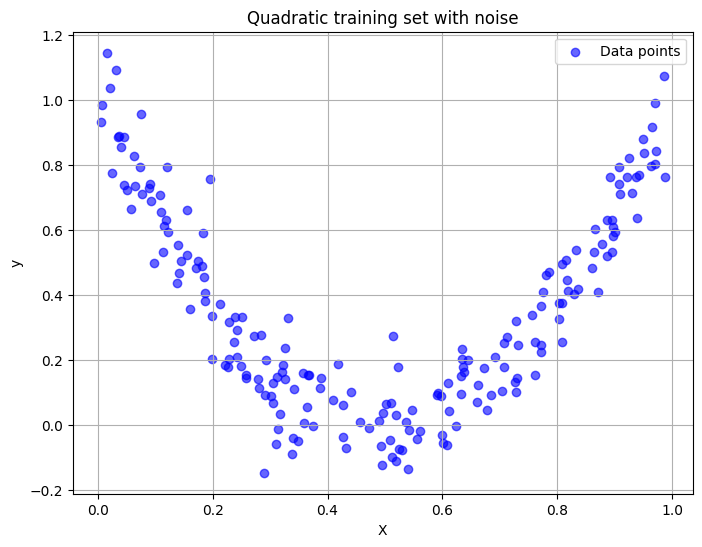

In [6]:
# plotting the dataset
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='blue',marker='o',alpha=0.6,label='Data points')
plt.title("Quadratic training set with noise")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show

Define the decision tree model in python
(depth = 2)

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2,random_state = 42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

visualizing tree(max_depth = 2)


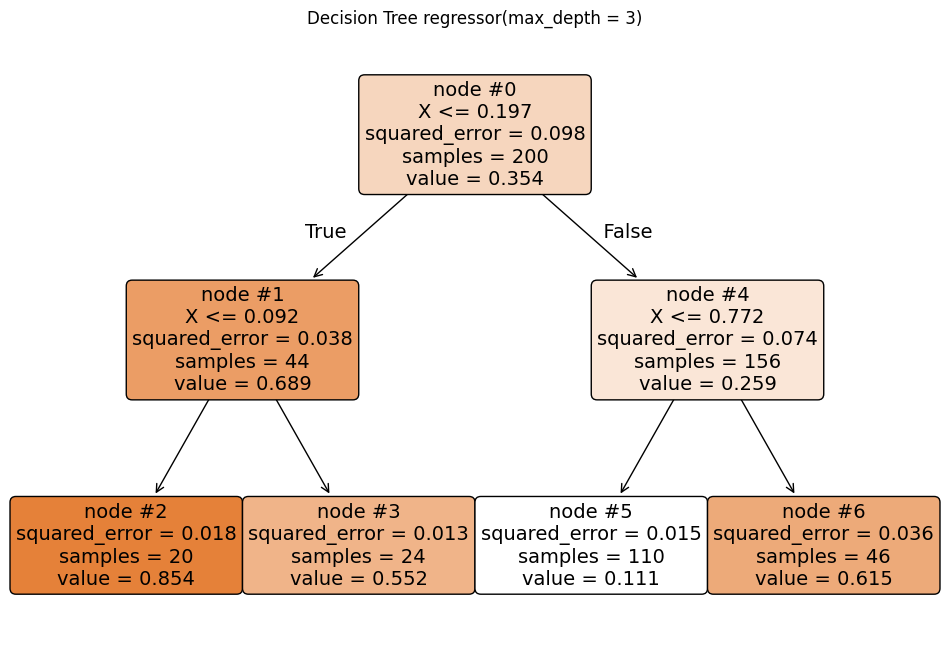

In [9]:
from sklearn.tree  import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree_reg,feature_names = ['X'],filled=True,rounded=True,impurity=True,node_ids=True)
plt.title('Decision Tree regressor(max_depth = 3)')
plt.show()

vizualizing the tree predictions compared with data (depth = 2)


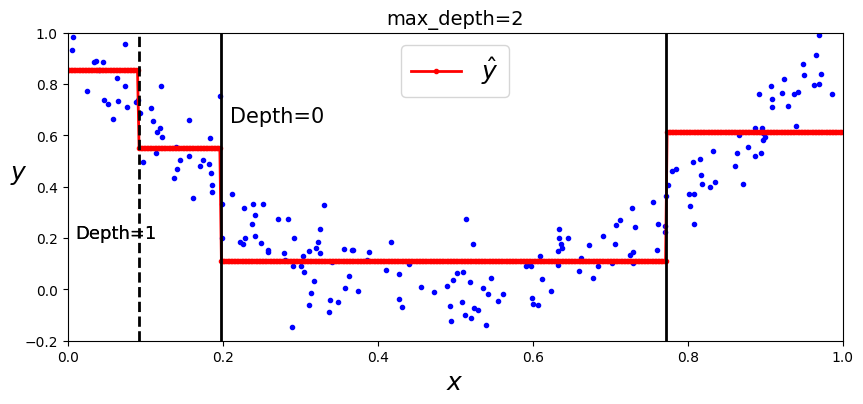

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X, y)
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes) #plt.axis([xmin, xmax, ymin, ymax])  axes = [0,1,-0.2,1] means x ranges (0,1) and y ranges:(-0.2,1)
    plt.xlabel("$x$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k-")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)
plt.show()


In [16]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1) # so exactly it automatically detects our requirement for the number of rows
print(x1.shape)

(500, 1)


defining the decision tree model in python(max_depth = 3)


In [11]:
tree_reg = DecisionTreeRegressor(max_depth=3,random_state = 42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=42)

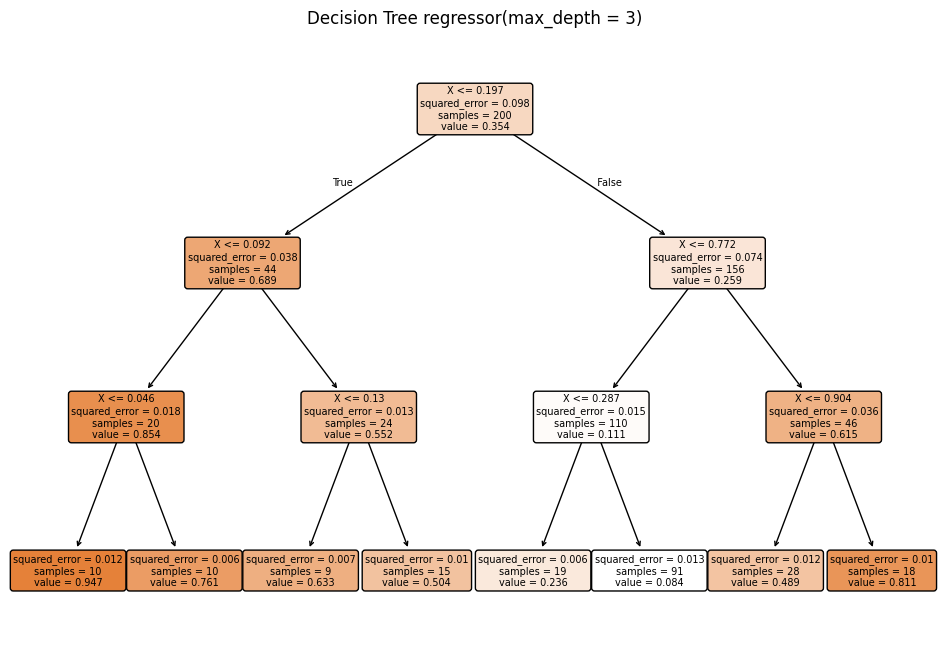

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree_reg,feature_names =['X'],filled=True,rounded=True)
plt.title('Decision Tree regressor(max_depth = 3)')
plt.show()

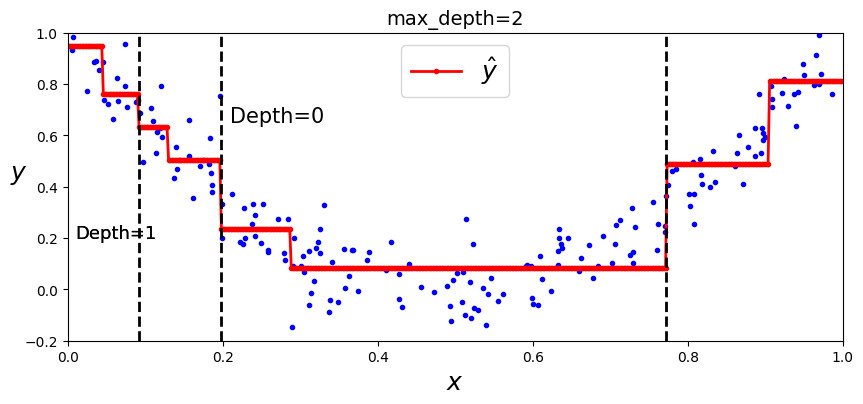

In [14]:

fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
plot_regression_predictions(tree_reg, X, y)
for split, style in ((0.1973, "k--"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)
plt.show()

when there is no depth defined or no regularization

Text(0.5, 1.0, 'No restrictions')

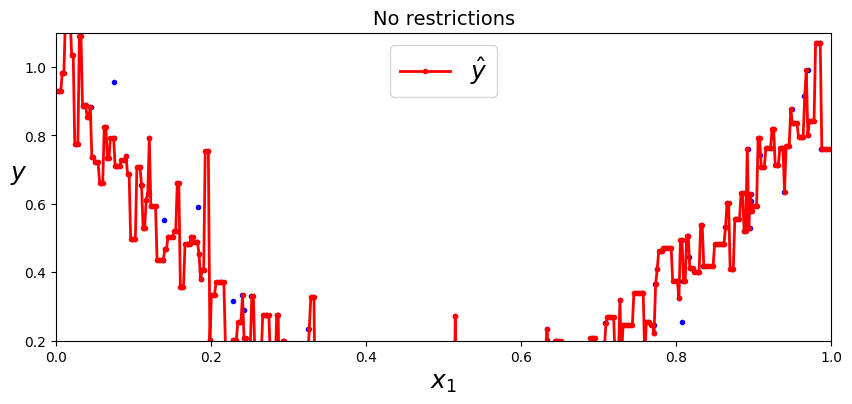

In [18]:
tree_reg1 = DecisionTreeRegressor(random_state=42,max_depth=20)
tree_reg1.fit(X, y)
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, 0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend (loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

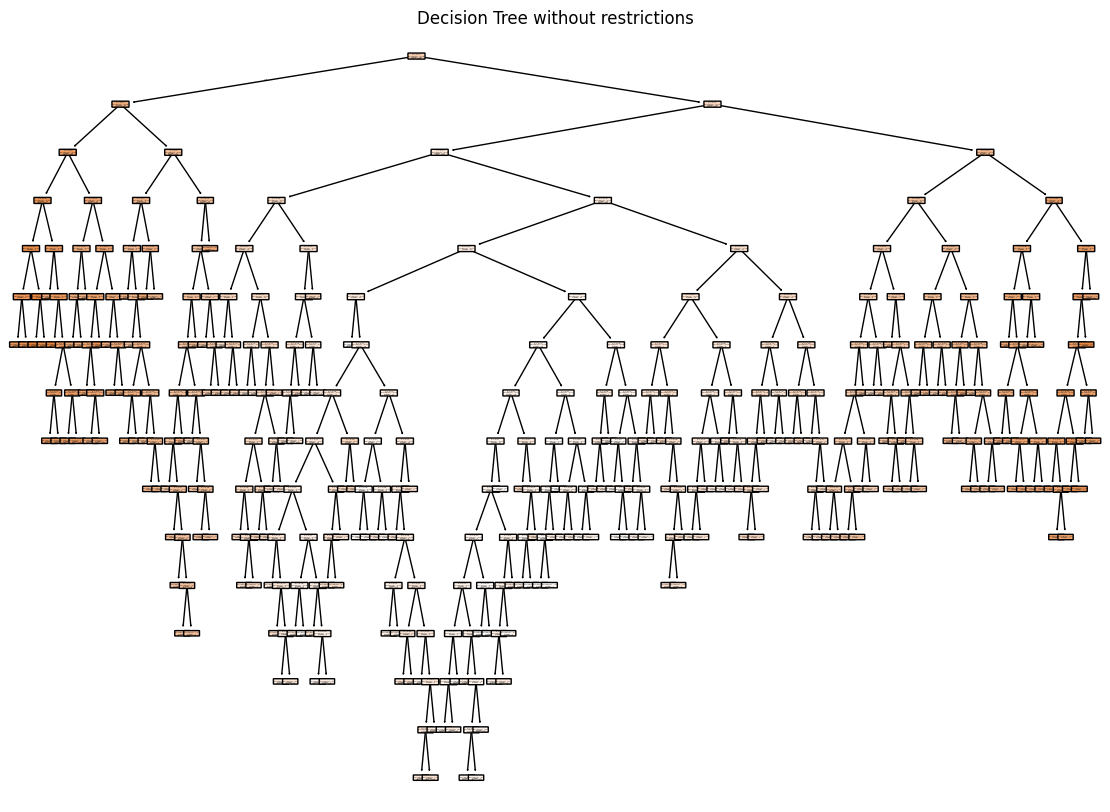

In [19]:
plt.figure(figsize=(14,10))
plot_tree(tree_reg1,feature_names=['X'],filled=True,rounded=True)
plt.title("Decision Tree without restrictions")
plt.show()

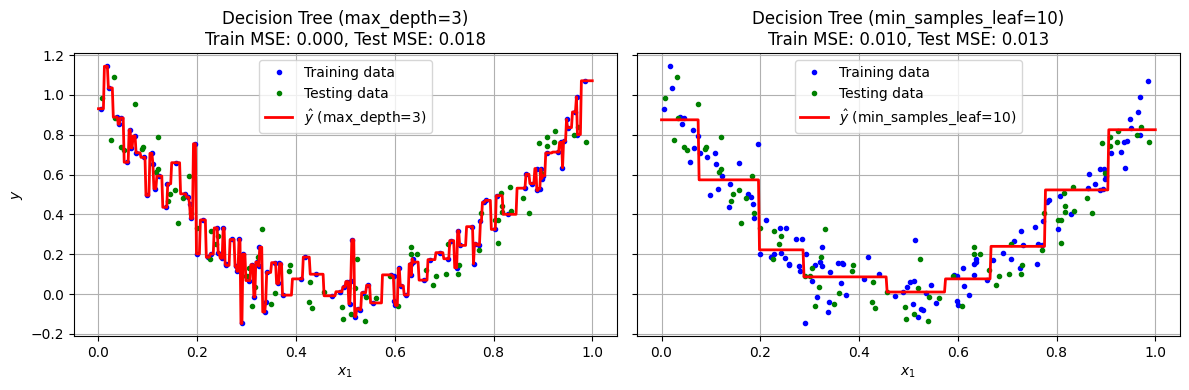

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Generate the dataset
np.random.seed (42)
m = 200
X = np.random.rand(m, 1)
y = 4* (X-0.5) ** 2
y = y + np.random.randn(m, 1) / 10
#Split the dataset into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Train the decision tree regressors
tree_reg1 = DecisionTreeRegressor (random_state=42)
tree_reg1.fit(X_train, y_train)
tree_reg2 = DecisionTreeRegressor(random_state=42,
min_samples_leaf=10)
tree_reg2.fit(X_train, y_train)
# Predict using the trained models
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)
# Evaluate the models
y_train_pred1 = tree_reg1.predict(X_train)
y_test_pred1 = tree_reg1.predict(X_test)
y_train_pred2 = tree_reg2.predict(X_train)
y_test_pred2 = tree_reg2.predict(X_test)
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)
fig, axes = plt.subplots (ncols=2, figsize=(12, 4), sharey=True)
axes[0].plot(X_train, y_train, "b.", label="Training data")
axes[0].plot(X_test, y_test, "g.", label="Testing data")
axes[0].plot(x1, y_pred1, "r-", linewidth=2, label=r"$\hat{y}$ (max_depth=3)")
axes[0].set_title(f"Decision Tree (max_depth=3)\nTrain MSE: {train_mse1:.3f}, Test MSE: {test_mse1:.3f}")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$y$")
axes[0].legend()
axes[0].grid(True)
axes [1].plot(X_train, y_train, "b.", label="Training data")
axes [1].plot(X_test, y_test, "g.", label="Testing data")
axes [1].plot(x1, y_pred2, "r-", linewidth=2, label=r"$\hat{y}$ (min_samples_leaf=10)")
axes[1].set_title(f"Decision Tree (min_samples_leaf=10)\nTrain MSE: {train_mse2:.3f}, Test MSE: {test_mse2:.3f}")
axes[1].set_xlabel("$x_1$")
axes [1]. legend()
axes [1].grid(True)
plt.tight_layout()
plt.show()